In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [24]:
numerical = pd.read_csv('../data/cleaned/numerical.csv')

In [27]:
display(numerical.head())

age  daily_rate  distance_from_home  hourly_rate  monthly_income  \
0   41        1102                   1           94            5993   
1   49         279                   8           61            5130   
2   37        1373                   2           92            2090   
3   33        1392                   3           56            2909   
4   27         591                   2           40            3468   

   monthly_rate  num_companies_worked  percent_salary_hike  \
0         19479                     8                   11   
1         24907                     1                   23   
2          2396                     6                   15   
3         23159                     1                   11   
4         16632                     9                   12   

   total_working_years  years_at_company  years_in_current_role  \
0                    8                 6                      4   
1                   10                10                      7   
2                    7                 0                      0   
3                    8                 8                      7   
4                    6                 2                      2   

   years_since_last_promotion  years_with_curr_manager  attrition  
0                           0                        5          1  
1                           1                        7          0  
2                           0                        0          1  
3                           3                        0          0  
4                           2                        2          0

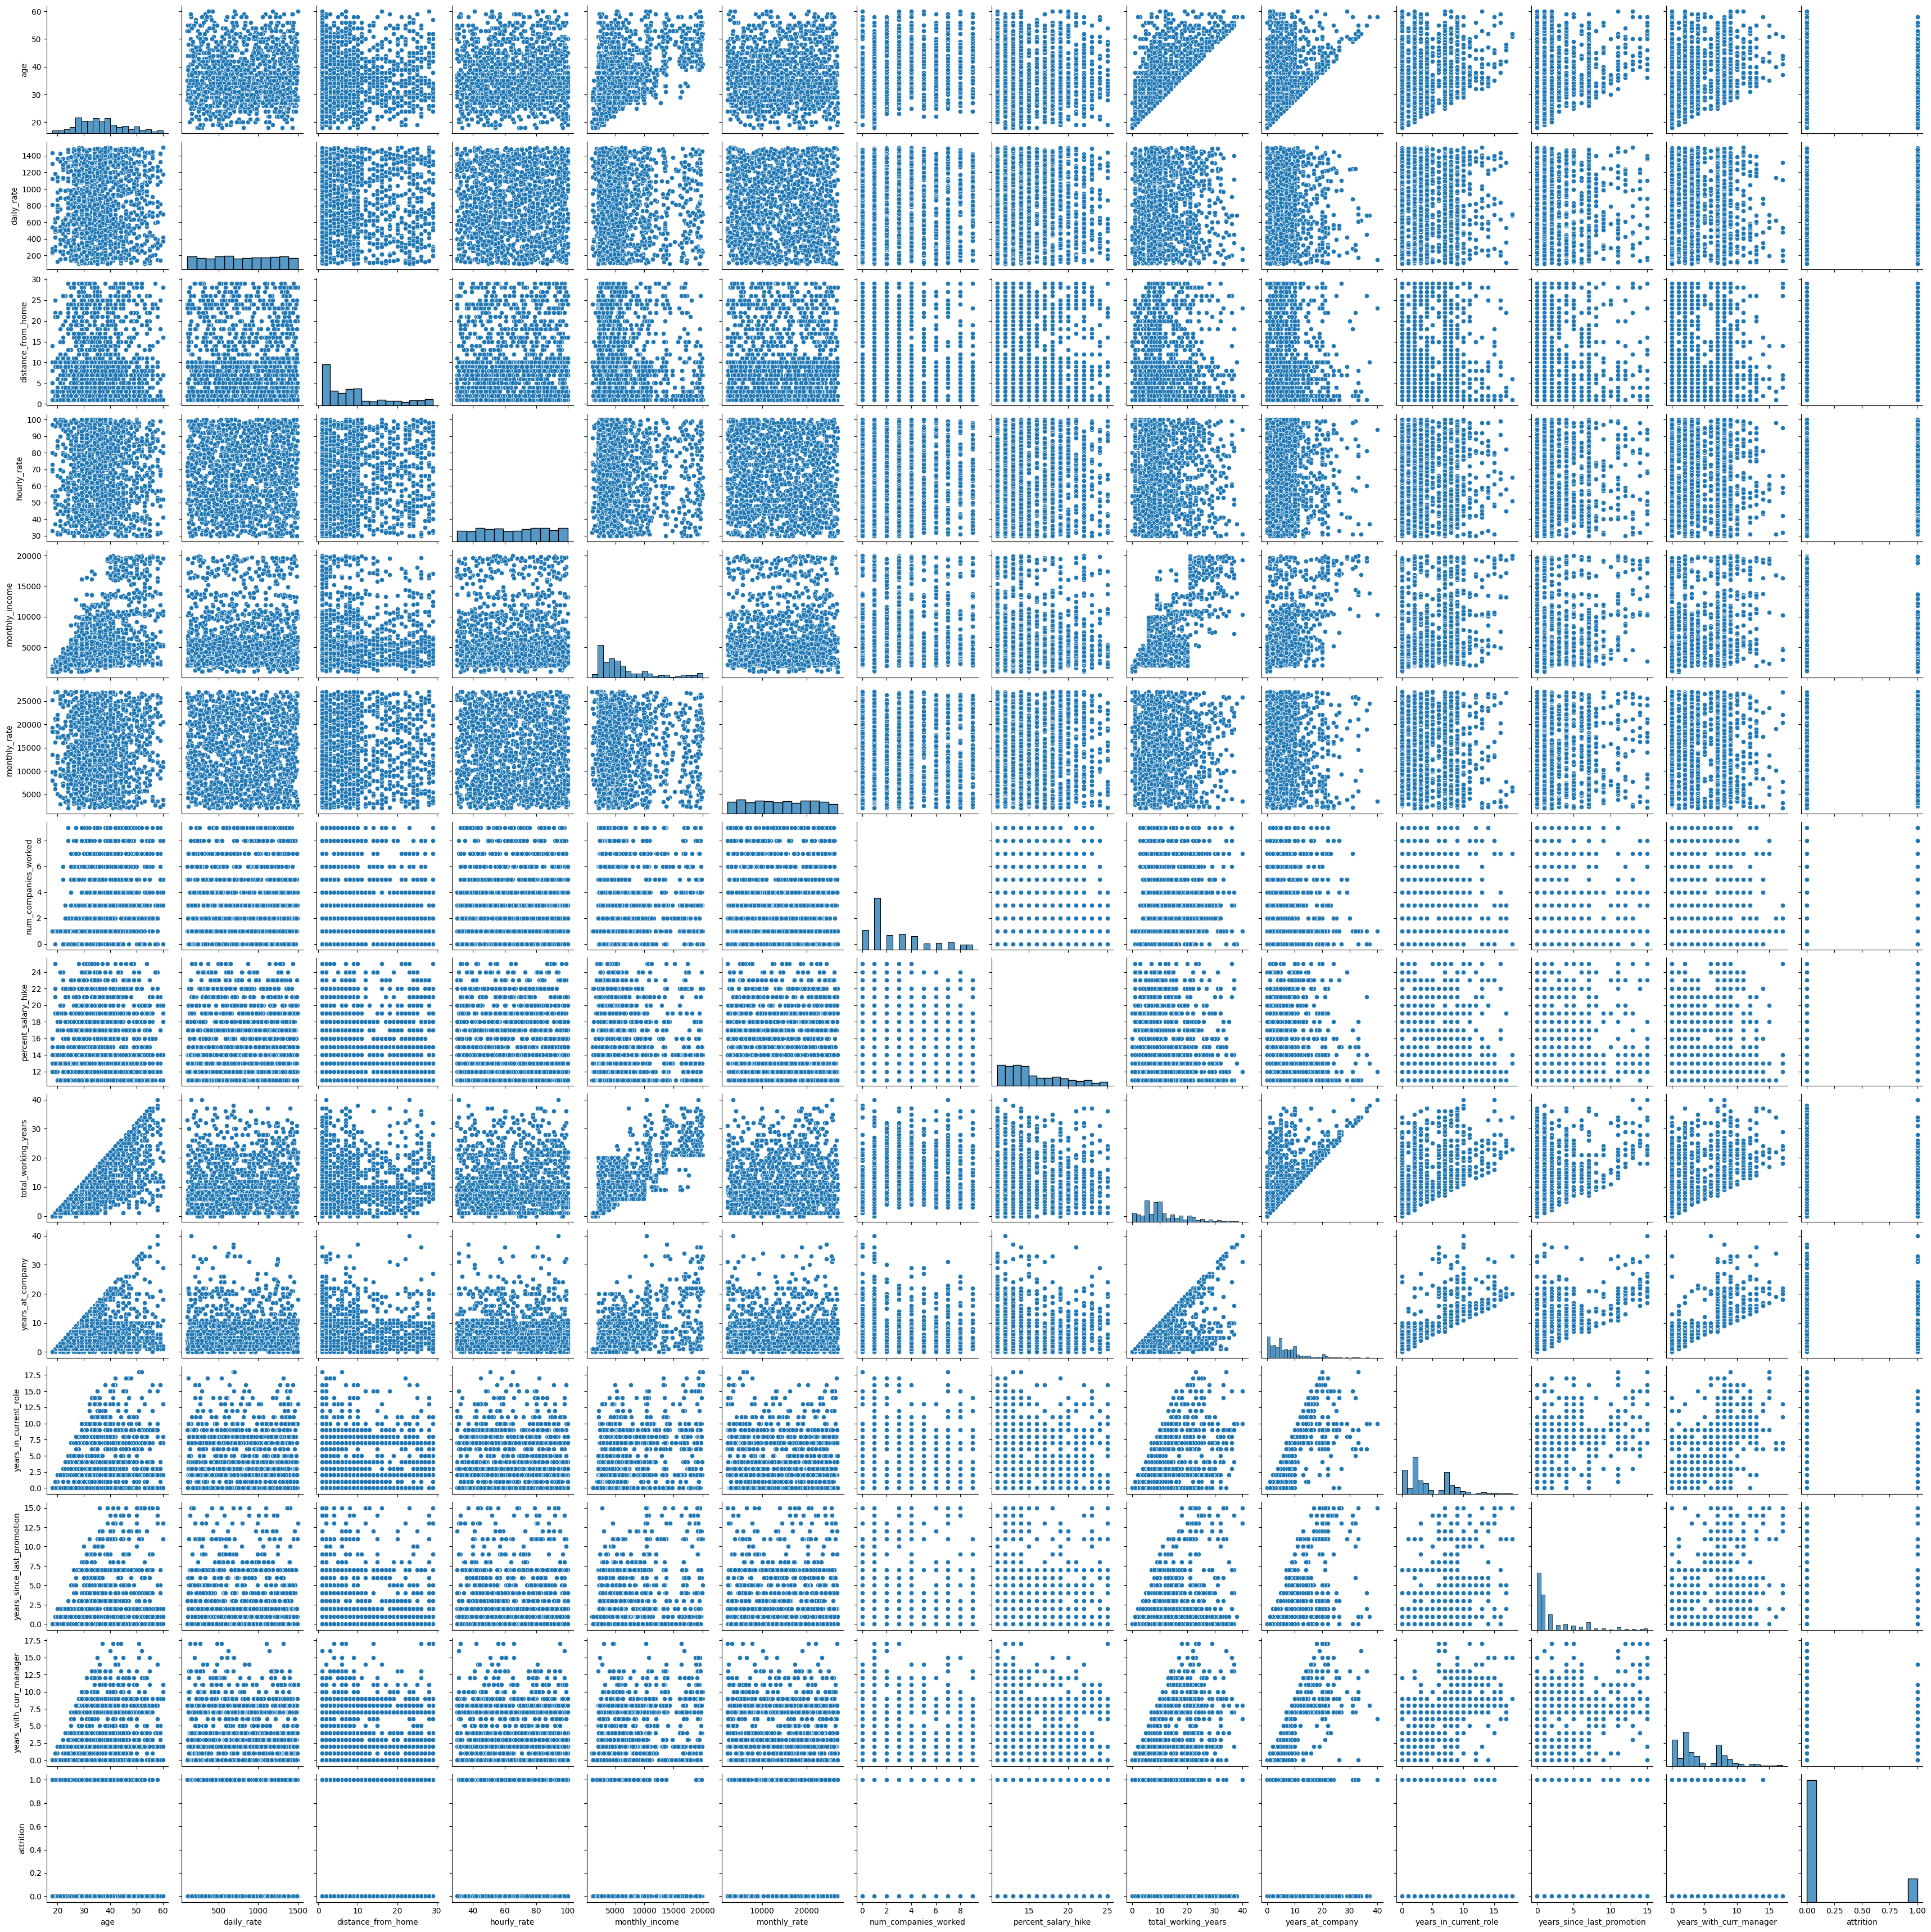

In [8]:
sns.pairplot(numerical)
plt.show()

### Splitting and scaling the data

In [28]:
y = numerical['attrition']
X = numerical.drop(['attrition'], axis=1)

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df  = pd.DataFrame(X_test,  columns = X.columns)

In [31]:
import pickle
from sklearn.preprocessing import MinMaxScaler # Sets for each colum the minimum = 0 and the maximum = 1

scaler = MinMaxScaler()

scaler.fit(X_train_df) # fit() Determine the min and the max of each column in the TRAIN set

path = "../src/"
scaler_file_name = "min_max_scaler.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

X_train_scaled = scaler.transform(X_train_df) # .transform() applies the transformation x_normalized will be np.array
X_test_scaled  = scaler.transform(X_test_df) # .transform() applies the transformation x_normalized will be np.array

# We create new Pandas DataFrames out of the Numpy arrays.

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X.columns)

X_train_scaled_df.head()

age  daily_rate  distance_from_home  hourly_rate  monthly_income  \
0  0.142857    0.177905            0.714286     0.385714        0.067773   
1  0.000000    0.132712            0.142857     0.614286        0.002212   
2  0.261905    0.821377            0.678571     0.214286        0.311848   
3  0.500000    0.279770            0.392857     0.514286        0.225698   
4  0.309524    0.149928            0.678571     0.842857        0.167878   

   monthly_rate  num_companies_worked  percent_salary_hike  \
0      0.318892              0.000000             0.214286   
1      0.457699              0.111111             0.285714   
2      0.346838              0.222222             0.214286   
3      0.224814              0.444444             0.714286   
4      0.663722              0.111111             0.000000   

   total_working_years  years_at_company  years_in_current_role  \
0                0.050             0.025               0.055556   
1                0.000             0.000               0.000000   
2                0.250             0.075               0.111111   
3                0.175             0.125               0.222222   
4                0.250             0.250               0.444444   

   years_since_last_promotion  years_with_curr_manager  
0                    0.000000                 0.000000  
1                    0.000000                 0.000000  
2                    0.000000                 0.117647  
3                    0.066667                 0.000000  
4                    0.000000                 0.117647

In [32]:
#check the ranges
X_train_scaled_df.describe().T

count      mean       std  min       25%  \
age                         1176.0  0.447016  0.219139  0.0  0.285714   
daily_rate                  1176.0  0.500295  0.291052  0.0  0.259684   
distance_from_home          1176.0  0.295007  0.291209  0.0  0.035714   
hourly_rate                 1176.0  0.523882  0.292338  0.0  0.257143   
monthly_income              1176.0  0.282966  0.247945  0.0  0.095011   
monthly_rate                1176.0  0.490597  0.285395  0.0  0.237342   
num_companies_worked        1176.0  0.294407  0.278079  0.0  0.111111   
percent_salary_hike         1176.0  0.303086  0.261865  0.0  0.071429   
total_working_years         1176.0  0.277976  0.195374  0.0  0.150000   
years_at_company            1176.0  0.173236  0.152216  0.0  0.075000   
years_in_current_role       1176.0  0.233796  0.200760  0.0  0.111111   
years_since_last_promotion  1176.0  0.140476  0.207860  0.0  0.000000   
years_with_curr_manager     1176.0  0.236895  0.207445  0.0  0.117647   

                                 50%       75%  max  
age                         0.428571  0.595238  1.0  
daily_rate                  0.498207  0.756994  1.0  
distance_from_home          0.214286  0.464286  1.0  
hourly_rate                 0.528571  0.771429  1.0  
monthly_income              0.196024  0.376988  1.0  
monthly_rate                0.487774  0.738065  1.0  
num_companies_worked        0.166667  0.444444  1.0  
percent_salary_hike         0.214286  0.500000  1.0  
total_working_years         0.250000  0.375000  1.0  
years_at_company            0.125000  0.250000  1.0  
years_in_current_role       0.166667  0.388889  1.0  
years_since_last_promotion  0.066667  0.133333  1.0  
years_with_curr_manager     0.176471  0.411765  1.0

### Balancing the target variable with SMOTE

In [33]:
# Instantiate the SMOTE class
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

### Balancing with random under-sampling

In [34]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the RandomUnderSampler class
under_sampler = RandomUnderSampler(random_state=42)

# Fit and transform the training data
X_train_under, y_train_under = under_sampler.fit_resample(X_train_scaled, y_train)

### Balancing with Near miss

In [35]:
from imblearn.under_sampling import NearMiss

# Instantiate the NearMiss class
near_miss = NearMiss(version=1) 

# Fit and transform the training data
X_train_near_miss, y_train_near_miss = near_miss.fit_resample(X_train_scaled, y_train)

## Linear regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
# Fit linear regression on the original scaled data
linear_model_original = LinearRegression()
linear_model_original.fit(X_train_scaled_df, y_train)

# Predict on the test set
y_test_pred_original = linear_model_original.predict(X_test_scaled_df)

# Evaluate the performance on the test set
mae_original = mean_absolute_error(y_test, y_test_pred_original)
mse_original = mean_squared_error(y_test, y_test_pred_original)
rmse_original = mean_squared_error(y_test, y_test_pred_original, squared=False)
r2_original = r2_score(y_test, y_test_pred_original)

# Fit linear regression on the SMOTE balanced data
linear_model_smote = LinearRegression()
linear_model_smote.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_test_pred_smote = linear_model_smote.predict(X_test_scaled_df)

# Evaluate the performance on the test set after SMOTE
mae_smote = mean_absolute_error(y_test, y_test_pred_smote)
mse_smote = mean_squared_error(y_test, y_test_pred_smote)
rmse_smote = mean_squared_error(y_test, y_test_pred_smote, squared=False)
r2_smote = r2_score(y_test, y_test_pred_smote)

# Fit linear regression on the Random Under-sampled data
linear_model_under = LinearRegression()
linear_model_under.fit(X_train_under, y_train_under)

# Predict on the test set
y_test_pred_under = linear_model_under.predict(X_test_scaled_df)

# Evaluate the performance on the test set after Random Under-sampling
mae_under = mean_absolute_error(y_test, y_test_pred_under)
mse_under = mean_squared_error(y_test, y_test_pred_under)
rmse_under = mean_squared_error(y_test, y_test_pred_under, squared=False)
r2_under = r2_score(y_test, y_test_pred_under)

# Fit linear regression on the Near Miss balanced data
linear_model_near_miss = LinearRegression()
linear_model_near_miss.fit(X_train_near_miss, y_train_near_miss)

# Predict on the test set
y_test_pred_near_miss = linear_model_near_miss.predict(X_test_scaled_df)

# Evaluate the performance on the test set after Near Miss
mae_near_miss = mean_absolute_error(y_test, y_test_pred_near_miss)
mse_near_miss = mean_squared_error(y_test, y_test_pred_near_miss)
rmse_near_miss = mean_squared_error(y_test, y_test_pred_near_miss, squared=False)
r2_near_miss = r2_score(y_test, y_test_pred_near_miss)

# Display the evaluation metrics
print("Evaluation Metrics for Original Data:")
print(f"MAE: {mae_original:.4f}")
print(f"MSE: {mse_original:.4f}")
print(f"RMSE: {rmse_original:.4f}")
print(f"R2: {r2_original:.4f}")
print("\n")

print("Evaluation Metrics for SMOTE Balanced Data:")
print(f"MAE: {mae_smote:.4f}")
print(f"MSE: {mse_smote:.4f}")
print(f"RMSE: {rmse_smote:.4f}")
print(f"R2: {r2_smote:.4f}")
print("\n")

print("Evaluation Metrics for Random Under-sampled Data:")
print(f"MAE: {mae_under:.4f}")
print(f"MSE: {mse_under:.4f}")
print(f"RMSE: {rmse_under:.4f}")
print(f"R2: {r2_under:.4f}")
print("\n")

print("Evaluation Metrics for Near Miss Balanced Data:")
print(f"MAE: {mae_near_miss:.4f}")
print(f"MSE: {mse_near_miss:.4f}")
print(f"RMSE: {rmse_near_miss:.4f}")
print(f"R2: {r2_near_miss:.4f}")

Evaluation Metrics for Original Data:
MAE: 0.2448
MSE: 0.1128
RMSE: 0.3359
R2: 0.0192


Evaluation Metrics for SMOTE Balanced Data:
MAE: 0.4290
MSE: 0.2218
RMSE: 0.4710
R2: -0.9281


Evaluation Metrics for Random Under-sampled Data:
MAE: 0.4370
MSE: 0.2263
RMSE: 0.4757
R2: -0.9668


Evaluation Metrics for Near Miss Balanced Data:
MAE: 0.6002
MSE: 0.4233
RMSE: 0.6506
R2: -2.6789


C:\Users\vikto\OneDrive\Desktop\Ironhack\Week_9\Final_project\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\vikto\OneDrive\Desktop\Ironhack\Week_9\Final_project\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\vikto\OneDrive\Desktop\Ironhack\Week_9\Final_project\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\vikto\OneDrive\Desktop\Ironhack\Week_9\Final_project\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without

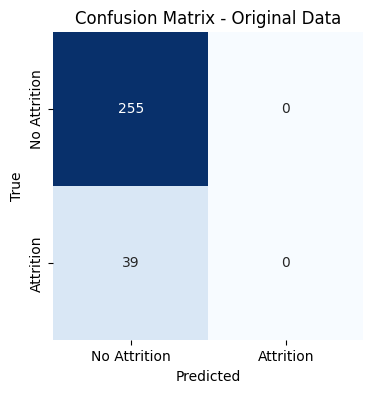

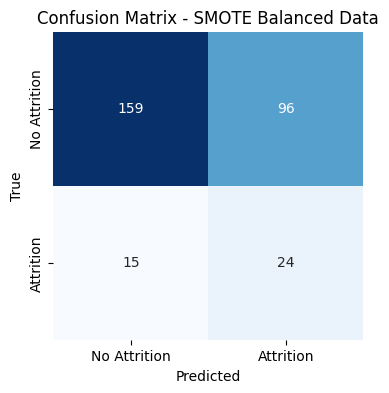

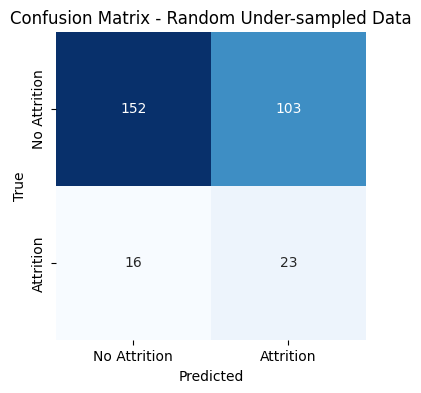

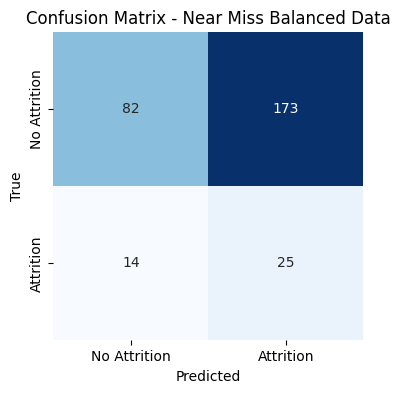

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, method_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['No Attrition', 'Attrition'],
                yticklabels=['No Attrition', 'Attrition'])
    plt.title(f'Confusion Matrix - {method_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices for each method
plot_confusion_matrix(y_test, (y_test_pred_original > 0.5).astype(int), 'Original Data')
plot_confusion_matrix(y_test, (y_test_pred_smote > 0.5).astype(int), 'SMOTE Balanced Data')
plot_confusion_matrix(y_test, (y_test_pred_under > 0.5).astype(int), 'Random Under-sampled Data')
plot_confusion_matrix(y_test, (y_test_pred_near_miss > 0.5).astype(int), 'Near Miss Balanced Data')

In [21]:
import pickle

# Save linear_model_original
with open('../src/linear_model_original.pkl', 'wb') as file:
    pickle.dump(linear_model_original, file)

# Save linear_model_smote
with open('../src/linear_model_smote.pkl', 'wb') as file:
    pickle.dump(linear_model_smote, file)

# Save linear_model_under
with open('../src/linear_model_under.pkl', 'wb') as file:
    pickle.dump(linear_model_under, file)

# Save linear_model_near_miss
with open('../src/linear_model_near_miss.pkl', 'wb') as file:
    pickle.dump(linear_model_near_miss, file)